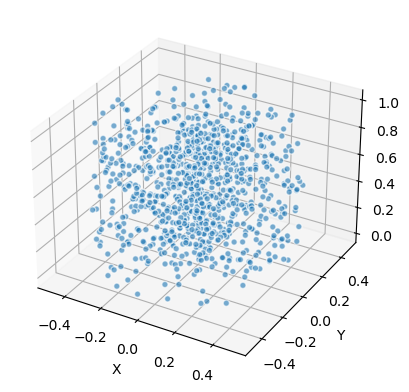

In [7]:
import numpy as np

def random_point_between_spheres_and_cylinder(p1, p2, d, num_points=1):
    """
    在两个点的球体和连线圆柱体组合区域内随机生成点。

    参数:
    - p1: 第一个点的坐标 (x1, y1, z1)
    - p2: 第二个点的坐标 (x2, y2, z2)
    - d: 球的半径和圆柱的半径
    - num_points: 生成点的数量
    
    返回:
    - points: 随机点的列表，每个点为 (x, y, z)
    """
    p1 = np.array(p1)
    p2 = np.array(p2)
    points = []
    
    # 计算连线向量和其单位向量
    line_vec = p2 - p1
    line_len = np.linalg.norm(line_vec)
    unit_vec = line_vec / line_len
    
    for _ in range(num_points):
        while True:
            # 随机决定生成的点是来自球体还是圆柱体
            if np.random.rand() < 0:  # 随机选择一个球体
                center = p1 if np.random.rand() < 0.5 else p2
                point = center + np.random.uniform(-1, 1, 3) * d
                if np.linalg.norm(point - center) <= d:
                    points.append(tuple(point))
                    break
            else:  # 随机选择圆柱体
                t = np.random.uniform(0, line_len)  # 在线段上的随机位置
                center = p1 + unit_vec * t
                # 随机生成圆柱的截面点
                r = np.random.uniform(0, d)
                theta = np.random.uniform(0, 2 * np.pi)
                offset = np.array([r * np.cos(theta), r * np.sin(theta), 0])
                # 将偏移量旋转到与线段方向一致
                if np.linalg.norm(line_vec[:2]) == 0:  # 如果线段平行于z轴
                    rot_matrix = np.eye(3)
                else:
                    z_vec = np.array([0, 0, 1])
                    axis = np.cross(z_vec, unit_vec)
                    axis_len = np.linalg.norm(axis)
                    axis = axis / axis_len if axis_len != 0 else axis
                    angle = np.arccos(np.dot(z_vec, unit_vec))
                    K = np.array([[0, -axis[2], axis[1]],
                                  [axis[2], 0, -axis[0]],
                                  [-axis[1], axis[0], 0]])
                    rot_matrix = np.eye(3) + np.sin(angle) * K + (1 - np.cos(angle)) * np.dot(K, K)
                offset = np.dot(rot_matrix, offset)
                point = center + offset
                if np.linalg.norm(point - center) <= d:
                    points.append(tuple(point))
                    break
    
    return points

# 测试代码
p1 = (0, 0, 0)
p2 = (0, 0, 1)
d = 0.5
points = random_point_between_spheres_and_cylinder(p1, p2, d, num_points=1000)

# 可视化生成的点
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x, y, z = zip(*points)
ax.scatter(x, y, z, alpha=0.6, edgecolor='w')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()
